In [4]:
import sys
#sys.path.insert(0, '../..')
from IPython import get_ipython
from IPython.lib.deepreload import reload

%load_ext autoreload
%autoreload 2
from aqua import Reader,catalogue, inspect_catalogue
from ocean3d import load_obs_data
from ocean3d import check_variable_name
from ocean3d import stratification
from ocean3d.ocean_circulation.multi_model.mld_spatial import mld_multi_model
from ocean3d.ocean_drifts.multi_model.trends import surface_trend

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
en4_reader = Reader(model='EN4', exp='en4', source="monthly")
en4_1 = en4_reader.retrieve(startdate="1990", enddate="1993")
en4_1 = check_variable_name(en4_1)
en4_2 = en4_reader.retrieve(startdate="2010", enddate="2013")
en4_2 = check_variable_name(en4_2)


ifs_nemo_historical_reader = Reader(model='IFS-NEMO', exp='historical-1990', source="lra-r100-monthly")
ifs_nemo_historical = ifs_nemo_historical_reader.retrieve(startdate="1990", enddate="1993")
ifs_nemo_historical = check_variable_name(ifs_nemo_historical)

ifs_nemo_ssp370_reader = Reader(model='IFS-NEMO', exp='ssp370', source="lra-r100-monthly")
ifs_nemo_ssp370 = ifs_nemo_ssp370_reader.retrieve(startdate="2020", enddate="2023")
ifs_nemo_ssp370 = check_variable_name(ifs_nemo_ssp370)

icon_ssp370_reader = Reader(model='ICON', exp='ssp370', source="lra-r100-monthly")
icon_ssp370 = icon_ssp370_reader.retrieve(startdate="2000", enddate="2023")
icon_ssp370 = check_variable_name(icon_ssp370)

icon_historical_reader = Reader(model='ICON', exp='historical-1990', source="lra-r100-monthly")
icon_historical = icon_historical_reader.retrieve(startdate="1990", enddate="1993")
icon_historical = check_variable_name(icon_historical)


2024-03-28 11:15:04 :: Reader :: WARNING  -> DATA_PATH parameter is required but is missing, setting to default /pfs/lustrep3/projappl/project_465000454/data/AQUA/datasets
2024-03-28 11:15:04 :: Reader :: WARNING  -> The requested default fixer name IFS-NEMO-default does not exist in fixes files
2024-03-28 11:15:04 :: Reader :: WARNING  -> No fixes available for model IFS-NEMO, experiment historical-1990, source lra-r100-monthly
2024-03-28 11:15:08 :: Unit :: WARNING  -> The unit of Pot. Temperature is Kelvin. Converting to degC
2024-03-28 11:15:08 :: Reader :: WARNING  -> DATA_PATH parameter is required but is missing, setting to default /pfs/lustrep3/projappl/project_465000454/data/AQUA/datasets
2024-03-28 11:15:08 :: Reader :: WARNING  -> The requested default fixer name IFS-NEMO-default does not exist in fixes files
2024-03-28 11:15:08 :: Reader :: WARNING  -> No fixes available for model IFS-NEMO, experiment ssp370, source lra-r100-monthly
2024-03-28 11:15:13 :: Unit :: WARNING  -

In [29]:
data_dict = {'EN4 1':ifs_nemo_ssp370,
             'EN4 2':ifs_nemo_ssp370,
             'IFS-NEMO Historical':ifs_nemo_historical,
             'IFS-NEMO ssp370':ifs_nemo_ssp370,
             'icon ssp370':icon_historical,
             'icon Historical':icon_ssp370,
             } 
o3d_request= {'model':'IFS-NEMO',
'exp':'historical-1990',
'source': 'lra-r100-monthly',
'data_dict': data_dict,
'region':'Labrador Sea',
'latS':None,
'latN':None,
'lonW':None,
'lonE':None,
'output':True,
"time" : "February",
'output_dir':'./output'}

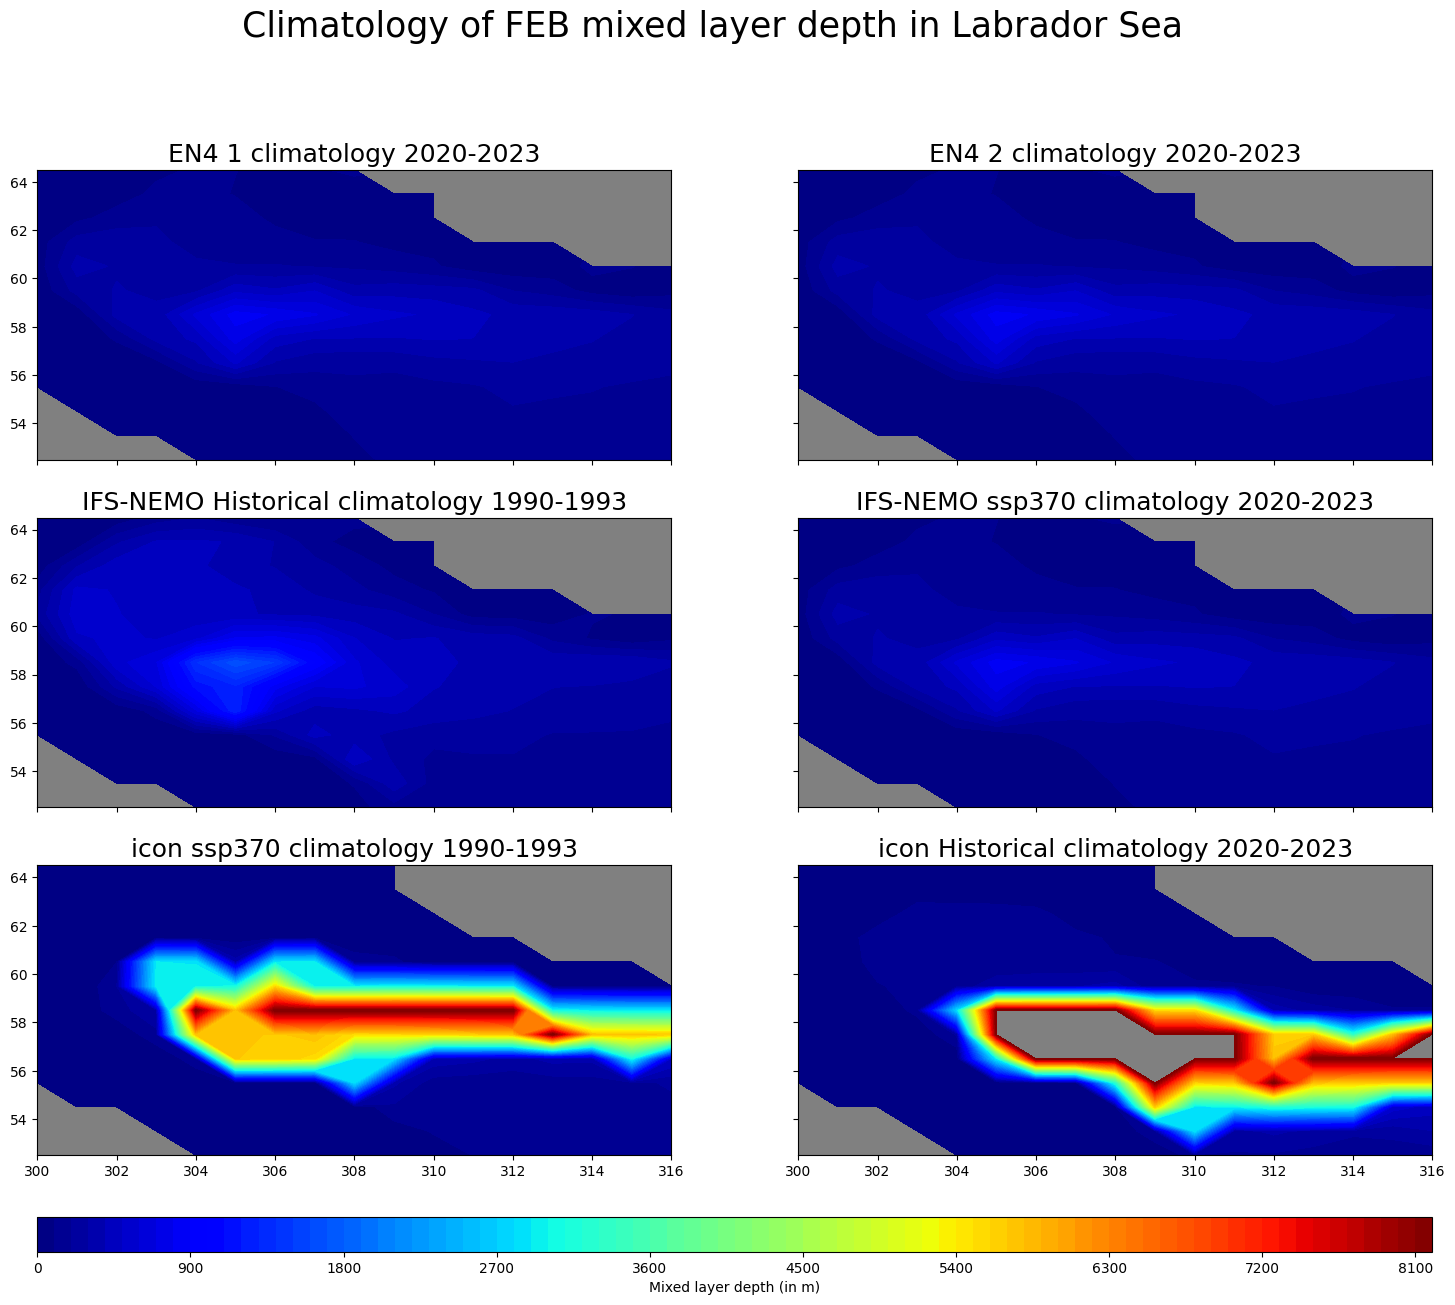

In [30]:
mld_multi_model(o3d_request)

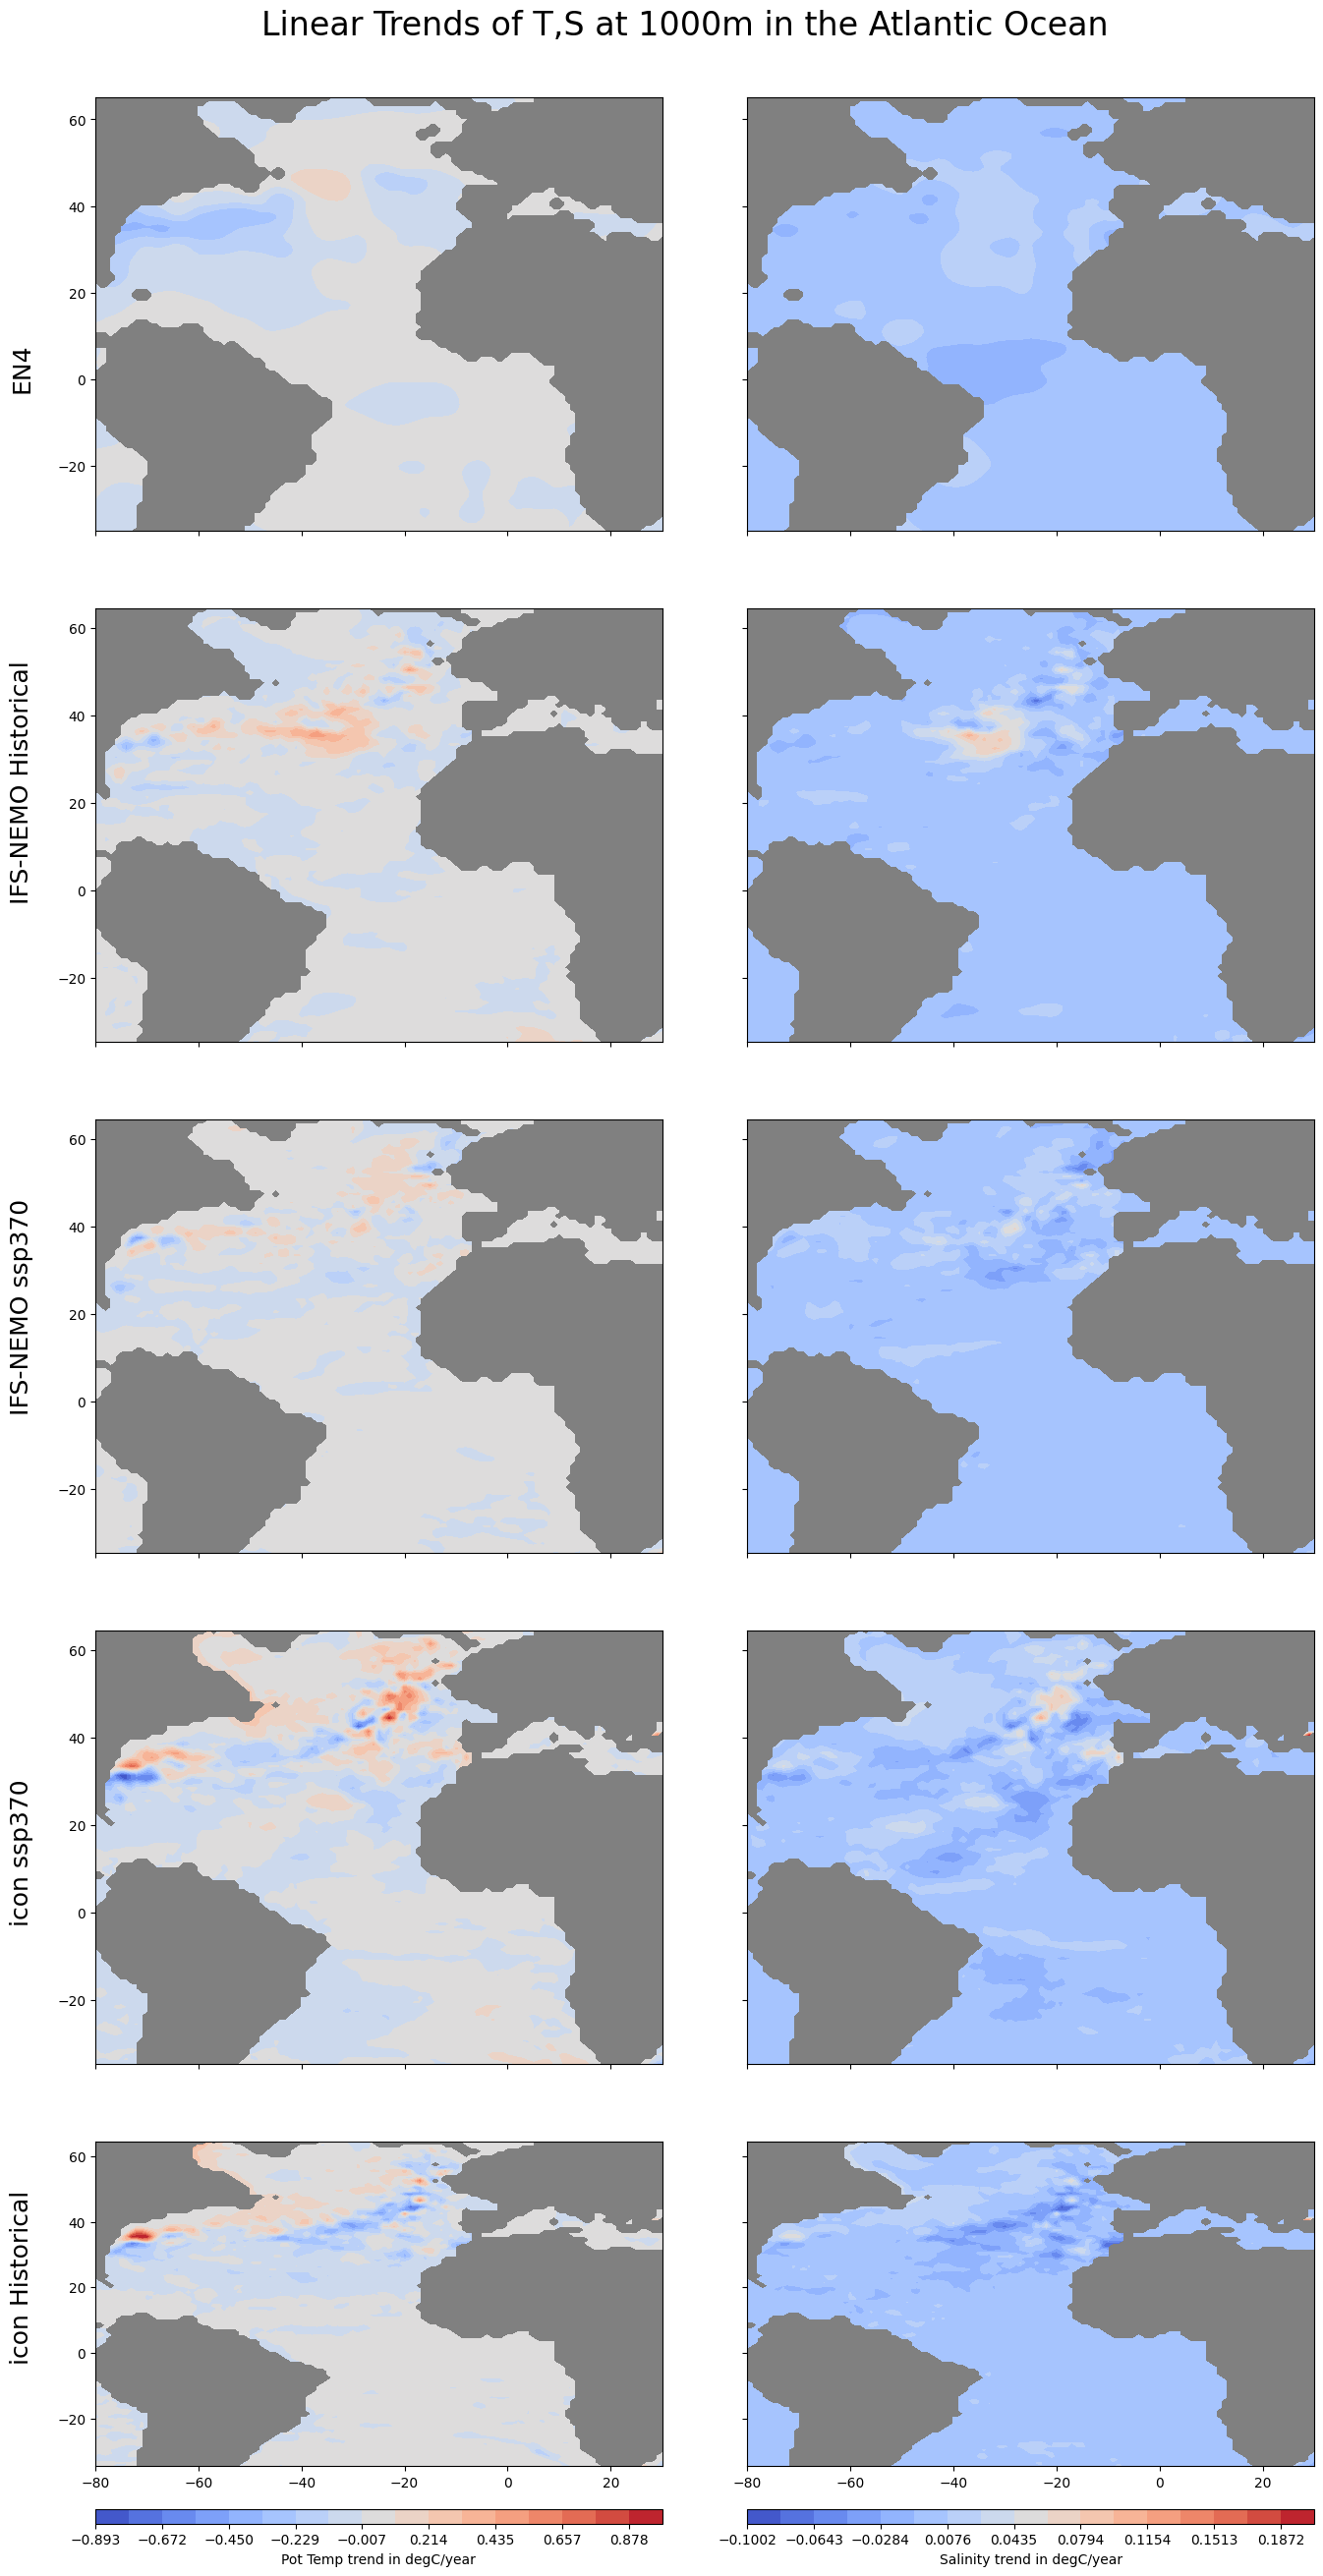

In [48]:
o3d_request["level"]=1000
o3d_request["region"]="Atlantic Ocean"
data_dict = {'EN4':en4_1,
             'IFS-NEMO Historical':ifs_nemo_historical,
             'IFS-NEMO ssp370':ifs_nemo_ssp370,
             'icon ssp370':icon_historical,
             'icon Historical':icon_ssp370,
             } 
o3d_request["data_dict"] = data_dict

surface_trend_plot = surface_trend(o3d_request)
surface_trend_plot.plot()

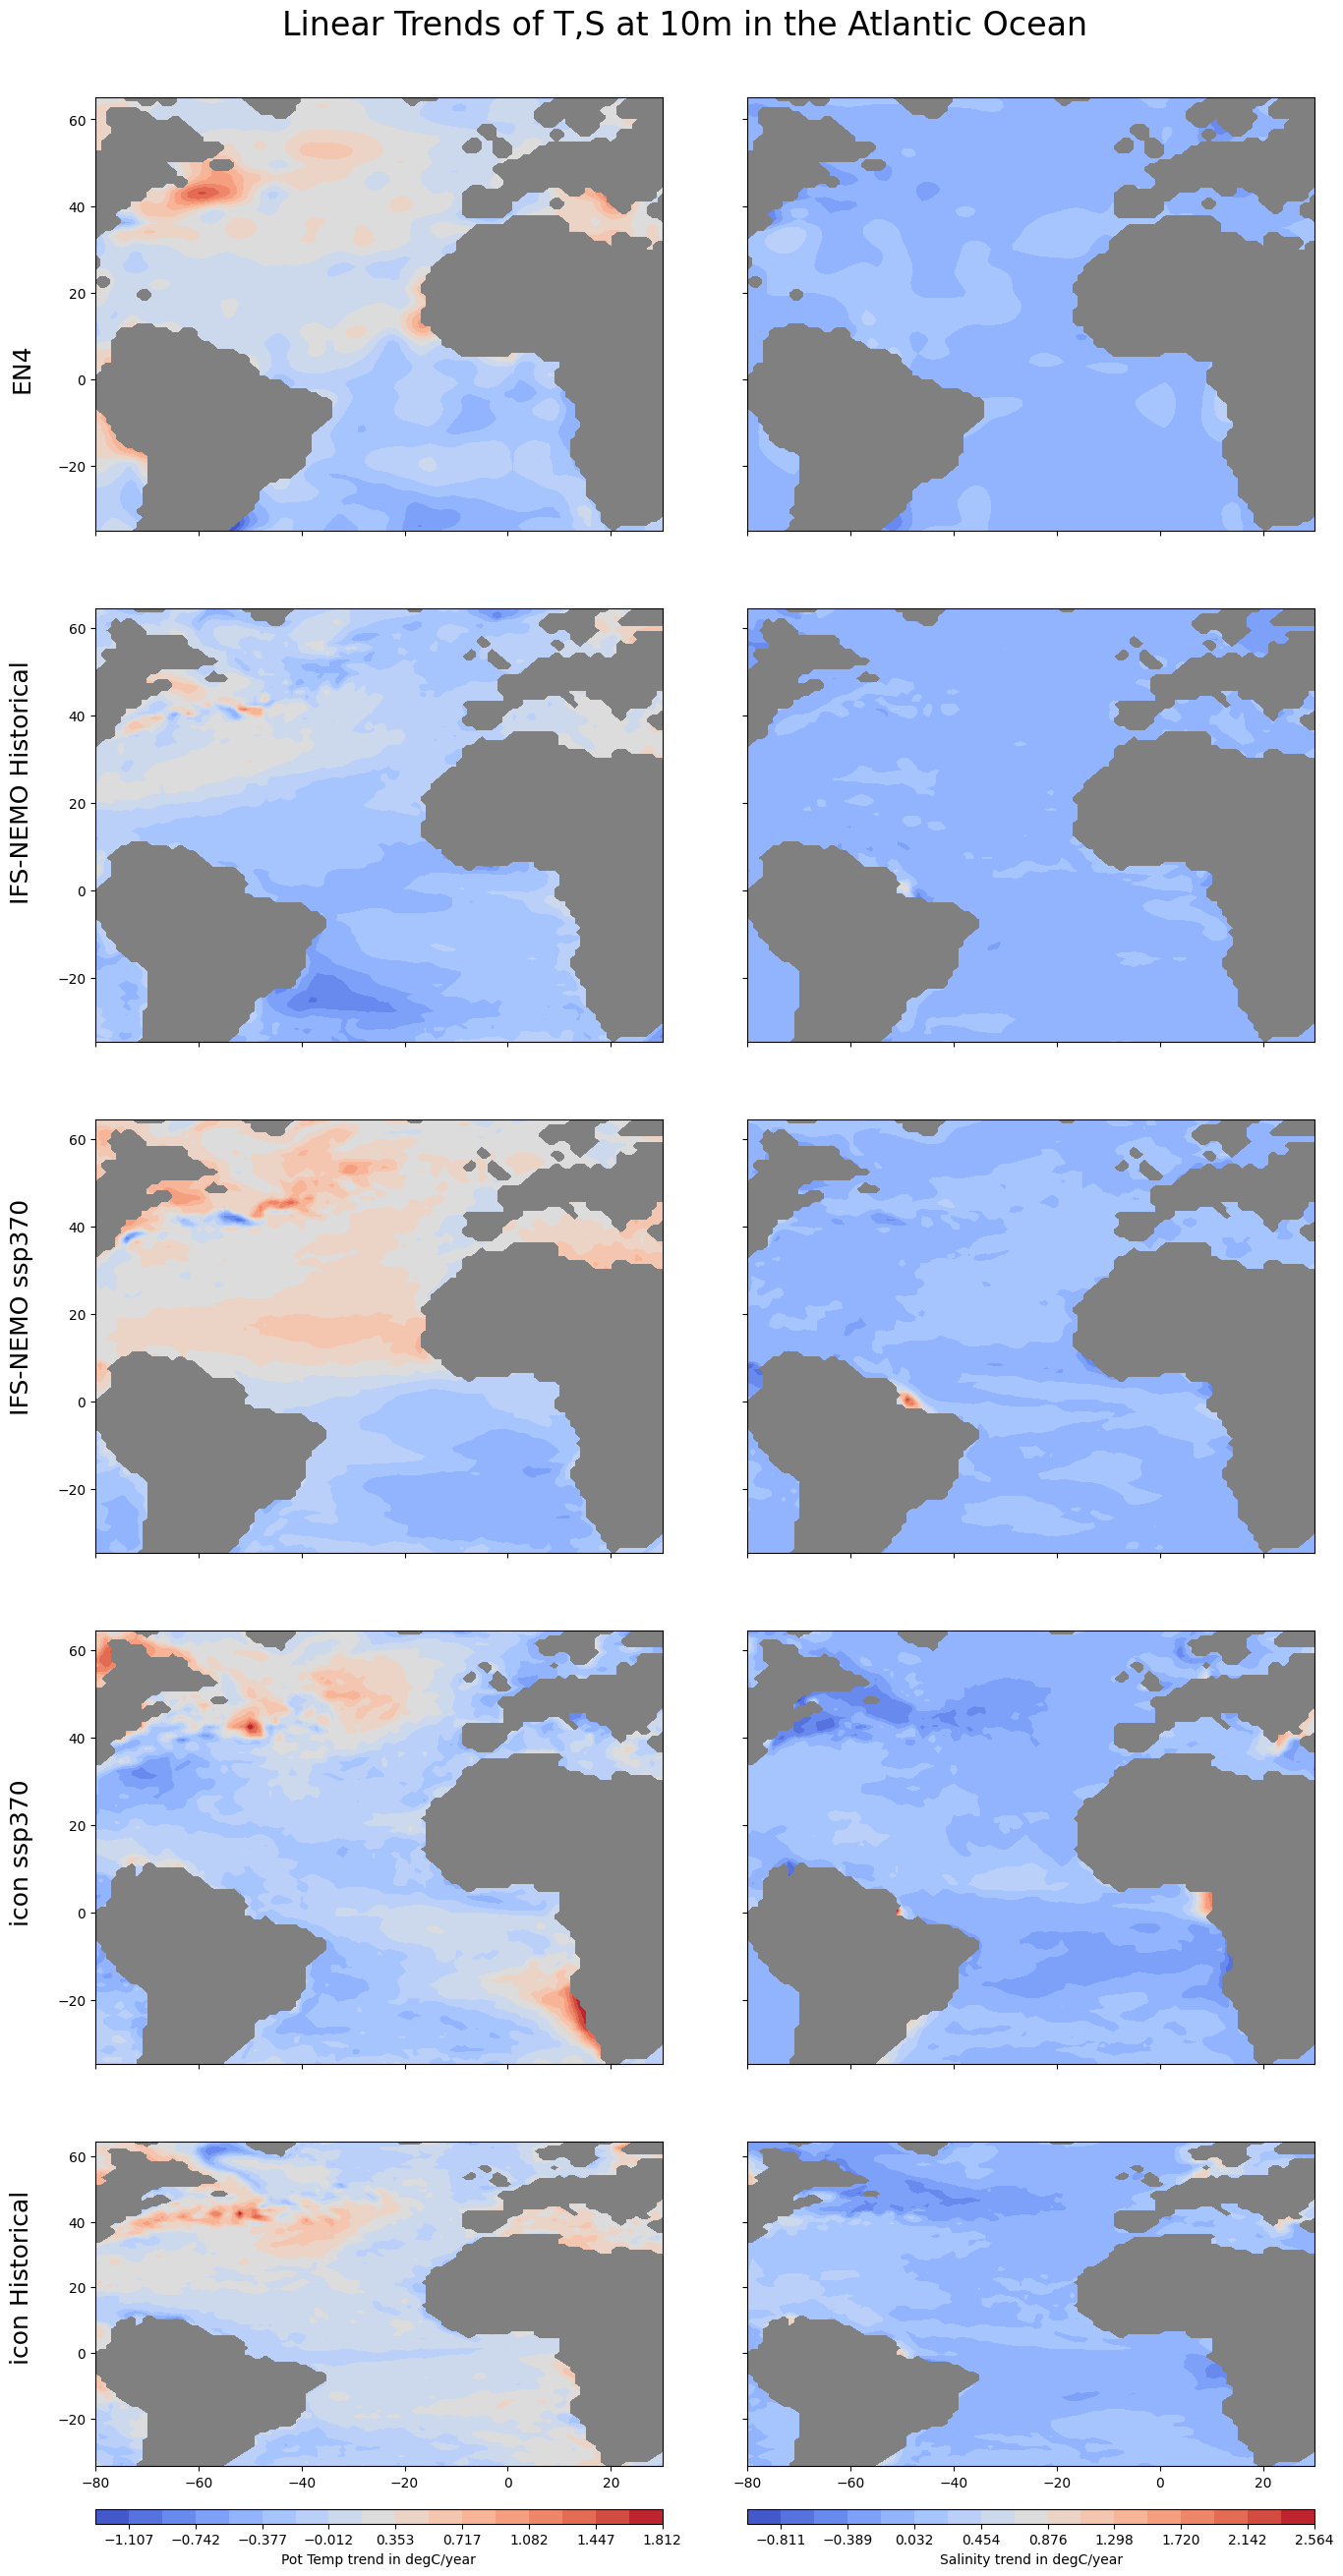

In [47]:
o3d_request["level"]=10
o3d_request["region"]="Atlantic Ocean"

data_dict = {'EN4':en4_1,
             'IFS-NEMO Historical':ifs_nemo_historical,
             'IFS-NEMO ssp370':ifs_nemo_ssp370,
             'icon ssp370':icon_historical,
             'icon Historical':icon_ssp370,
             } 
o3d_request["data_dict"] = data_dict

surface_trend_plot = surface_trend(o3d_request)
surface_trend_plot.plot()

In [16]:
icon_historical_reader = Reader(model='ICON', exp='historical-1990', source="lra-r100-monthly")
icon_historical = icon_historical_reader.retrieve(startdate="1990", enddate="1993")
# icon_historical = check_variable_name(icon_historical)

2024-03-27 11:30:17 :: Reader :: WARNING  -> DATA_PATH parameter is required but is missing, setting to default /pfs/lustrep3/projappl/project_465000454/data/AQUA/datasets
/opt/conda/lib/python3.11/site-packages/xarray/core/indexing.py:1436: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]
/opt/conda/lib/python3.11/site-packages/xarray/core/indexing.py:1430: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large

In [17]:
icon_historical

<xarray.Dataset> Size: 14GB
Dimensions:      (time: 48, lat: 180, lon: 360, level: 90)
Coordinates:
  * time         (time) datetime64[ns] 384B 1990-01-01 1990-02-01 ... 1993-12-01
  * lat          (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon          (lon) float64 3kB 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * level        (level) float64 720B 1.0 3.1 5.0 ... 5.816e+03 8.24e+03
    idx_level    (level) float64 720B dask.array<chunksize=(90,), meta=np.ndarray>
Data variables: (12/23)
    2t           (time, lat, lon) float64 25MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    avg_siconc   (time, lat, lon) float64 25MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    avg_sithick  (time, lat, lon) float64 25MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    avg_so       (time, level, lat, lon) float64 2GB dask.array<chunksize=(7, 90, 180, 360), meta=np.ndarray>
    avg_thetao   (time, level, lat, lon) float64 2GB dask.array<chunksize=(7, 90, 180, 360), meta=np.ndarray>
    msdwlwrf     (time, lat, lon) float64 25MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    ...           ...
    t            (time, level, lat, lon) float64 2GB dask.array<chunksize=(12, 90, 180, 360), meta=np.ndarray>
    tcc          (time, lat, lon) float64 25MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    tciw         (time, lat, lon) float64 25MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    tclw         (time, lat, lon) float64 25MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    u            (time, level, lat, lon) float64 2GB dask.array<chunksize=(12, 90, 180, 360), meta=np.ndarray>
    v            (time, level, lat, lon) float64 2GB dask.array<chunksize=(12, 90, 180, 360), meta=np.ndarray>
Attributes:
    history:  \n2024-03-27 11:30:43 AQUA💧: Retrieved from ICON_historical-199...